# Stock price prediction with LSTM (Long Short Term Memory)

### Install packages 

In [51]:
!pip install --upgrade pip
!pip install yfinance

### Import packages

In [52]:
# fetch data and print stock data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt


In [53]:
# get stock data
stock_data = yf.download('TATAELXSI.NS', start='2004-01-01', end='2023-12-31')
print(stock_data.head())
print(stock_data.shape)



[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2004-01-01  60.849998  61.950001  60.599998  61.375000  39.528217   561346
2004-01-02  61.849998  65.675003  61.525002  64.050003  41.251041  2051598
2004-01-05  64.650002  65.500000  62.525002  63.125000  40.655289  1461746
2004-01-06  63.500000  64.699997  60.250000  60.924999  39.238403  1013920
2004-01-07  61.099998  61.349998  58.500000  59.424999  38.272331   764548
(4948, 6)


### Plot line chart based on closing price

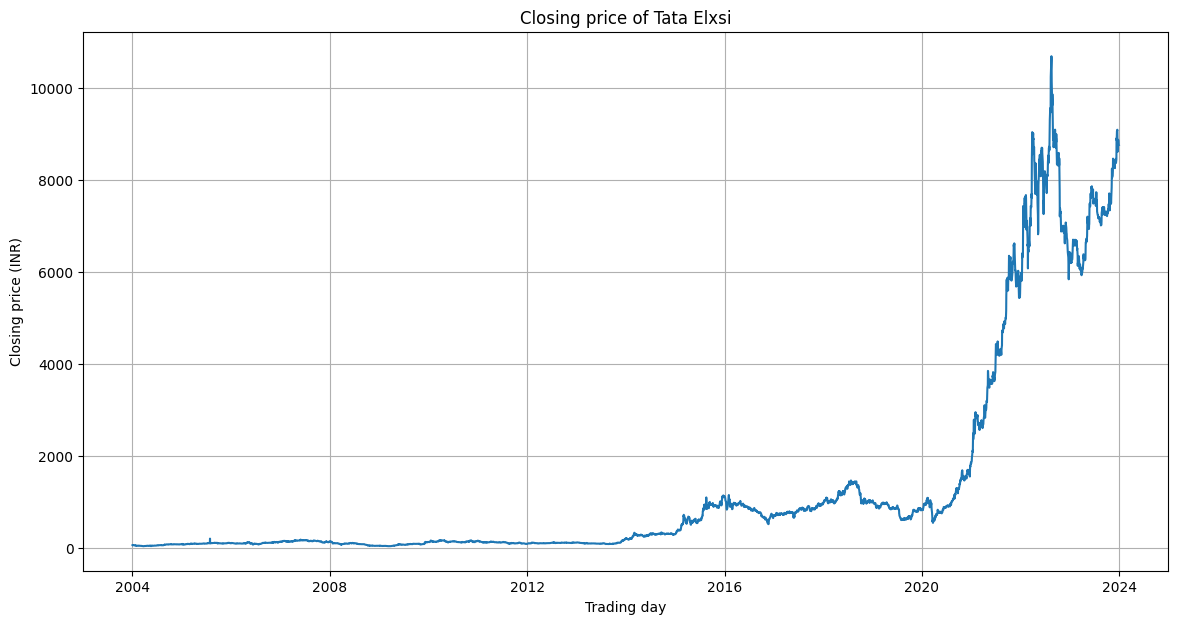

In [59]:
# plot line chart based on closing price
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'])
plt.title('Closing price of Tata Elxsi')
plt.ylabel('Closing price (INR)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()

